In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [64]:
dataset = pd.read_excel('/content/gdrive/MyDrive/AlmaBatter/CAPSTONE PROJECT/Capstone - 3 (credit card defaulter using classification) /default of credit card clients.xls - Data.xlsx')
dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [65]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10747,10748.0,310000.0,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,172772.0,152397.0,110375.0,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0.0
12573,12574.0,10000.0,2.0,3.0,1.0,49.0,-1.0,-1.0,-2.0,-1.0,2.0,2.0,32.0,-358.0,-748.0,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1.0
29676,29677.0,50000.0,1.0,2.0,1.0,28.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,430.0,0.0,46257.0,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0.0
8856,8857.0,80000.0,2.0,3.0,1.0,52.0,2.0,2.0,3.0,3.0,3.0,2.0,36649.0,39448.0,40101.0,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1.0
21098,21099.0,270000.0,1.0,1.0,2.0,34.0,1.0,2.0,0.0,0.0,2.0,0.0,20979.0,17228.0,20924.0,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0.0


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2000 non-null   float64
 1   LIMIT_BAL                   2000 non-null   float64
 2   SEX                         2000 non-null   float64
 3   EDUCATION                   2000 non-null   float64
 4   MARRIAGE                    2000 non-null   float64
 5   AGE                         2000 non-null   float64
 6   PAY_0                       2000 non-null   float64
 7   PAY_2                       2000 non-null   float64
 8   PAY_3                       2000 non-null   float64
 9   PAY_4                       2000 non-null   float64
 10  PAY_5                       2000 non-null   float64
 11  PAY_6                       2000 non-null   float64
 12  BILL_AMT1                   2000 non-null   float64
 13  BILL_AMT2                   

In [67]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,14950.749000,171825.000000,1.603000,1.853000,1.555000,35.458000,-0.024500,-0.138500,-0.179500,-0.213000,-0.250000,-0.272000,53341.091500,50172.804500,4.823936e+04,44390.095500,41502.586000,39643.917000,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500,0.219500
std,8624.251173,131598.930521,0.489398,0.798567,0.516825,9.144892,1.103861,1.163613,1.177698,1.166753,1.135405,1.166489,76676.065104,72959.306173,7.850584e+04,65827.281839,61928.132672,60472.016246,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739,0.414011
min,3.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-8187.000000,-18088.000000,-9.032000e+03,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7404.000000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3974.750000,3057.750000,3.048500e+03,2939.500000,2158.750000,1319.250000,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000,0.000000
50%,14889.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23410.000000,21378.500000,2.046300e+04,19454.000000,18652.000000,17621.500000,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000,0.000000
75%,22510.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70972.500000,65359.500000,6.056850e+04,53394.250000,51005.500000,49484.750000,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,71.000000,6.000000,5.000000,8.000000,7.000000,7.000000,7.000000,746814.000000,562316.000000,1.664089e+06,487066.000000,489200.000000,513798.000000,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000,1.000000


In [68]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [70]:
dataset.index = dataset['ID']

In [71]:
dataset.drop('ID',axis=1,inplace=True)

In [72]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
10748.0,310000.0,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,172772.0,152397.0,110375.0,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0.0
12574.0,10000.0,2.0,3.0,1.0,49.0,-1.0,-1.0,-2.0,-1.0,2.0,2.0,32.0,-358.0,-748.0,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1.0
29677.0,50000.0,1.0,2.0,1.0,28.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,430.0,0.0,46257.0,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0.0
8857.0,80000.0,2.0,3.0,1.0,52.0,2.0,2.0,3.0,3.0,3.0,2.0,36649.0,39448.0,40101.0,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1.0
21099.0,270000.0,1.0,1.0,2.0,34.0,1.0,2.0,0.0,0.0,2.0,0.0,20979.0,17228.0,20924.0,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0.0


In [73]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [74]:
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [76]:
dataset = dataset.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
10748.0,310000.0,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,172772.0,152397.0,110375.0,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0.0
12574.0,10000.0,2.0,3.0,1.0,49.0,-1.0,-1.0,-2.0,-1.0,2.0,2.0,32.0,-358.0,-748.0,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1.0
29677.0,50000.0,1.0,2.0,1.0,28.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,430.0,0.0,46257.0,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0.0
8857.0,80000.0,2.0,3.0,1.0,52.0,2.0,2.0,3.0,3.0,3.0,2.0,36649.0,39448.0,40101.0,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1.0
21099.0,270000.0,1.0,1.0,2.0,34.0,1.0,2.0,0.0,0.0,2.0,0.0,20979.0,17228.0,20924.0,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0.0


In [77]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

VISUALISATION

Text(0.5, 1.0, 'SEX v/s COUNT')

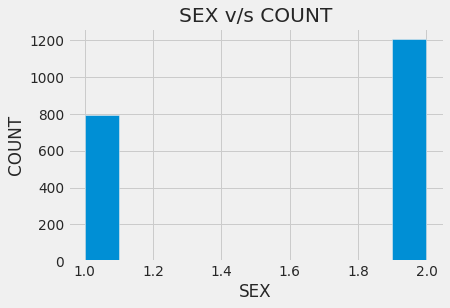

In [78]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

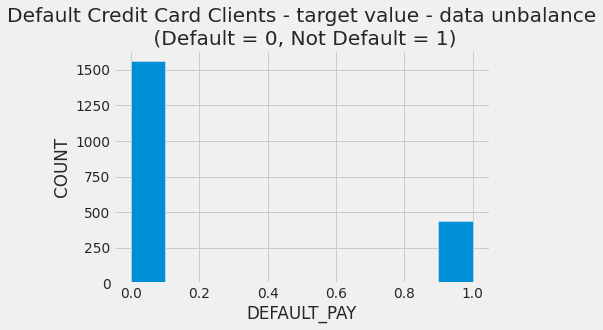

In [79]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

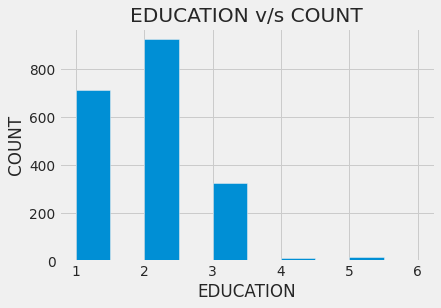

In [80]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

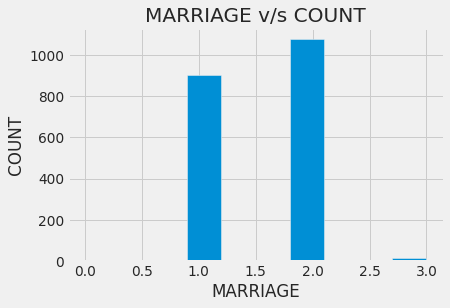

In [81]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

In [28]:
target_col = ['Y']

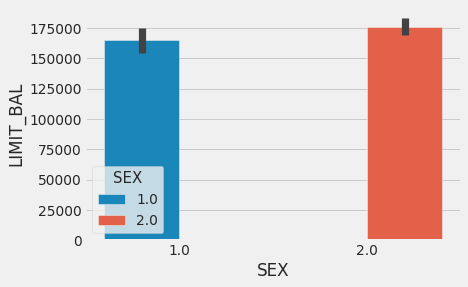

In [82]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

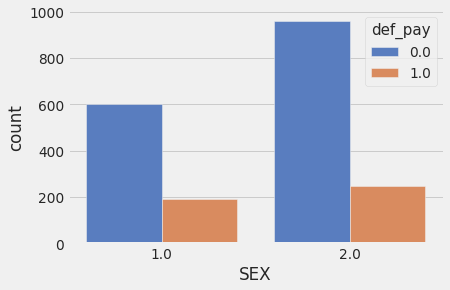

In [83]:
sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")

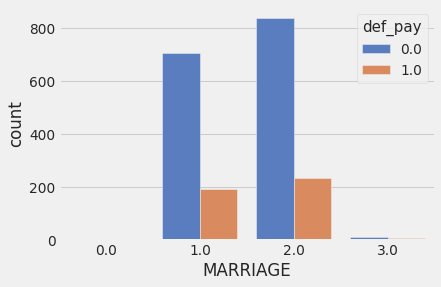

In [84]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")


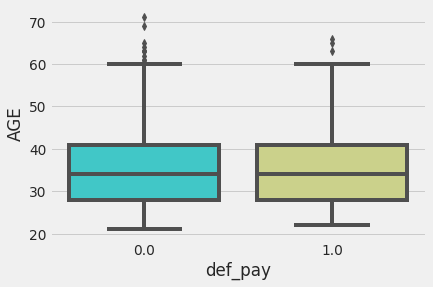

In [85]:
sns.boxplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')


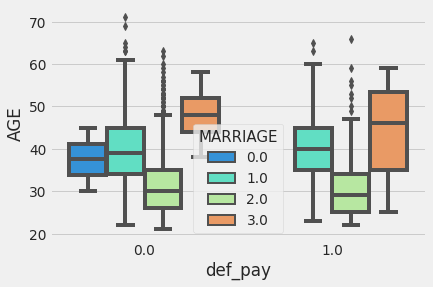

In [86]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")


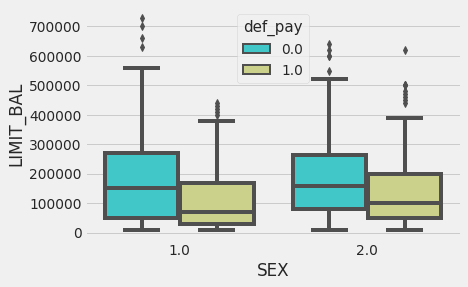

In [87]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")


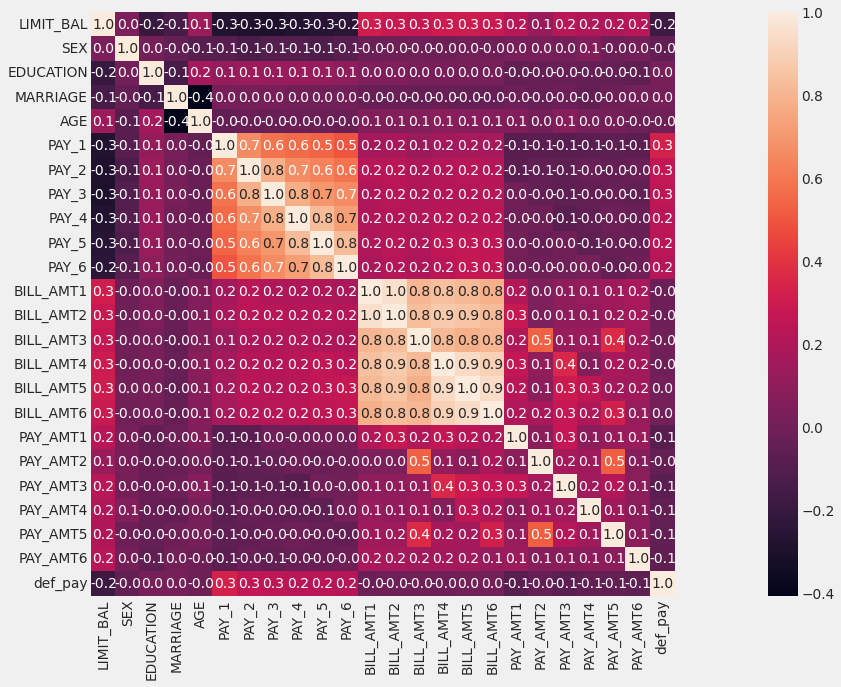

In [89]:
correlation = dataset.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ) 

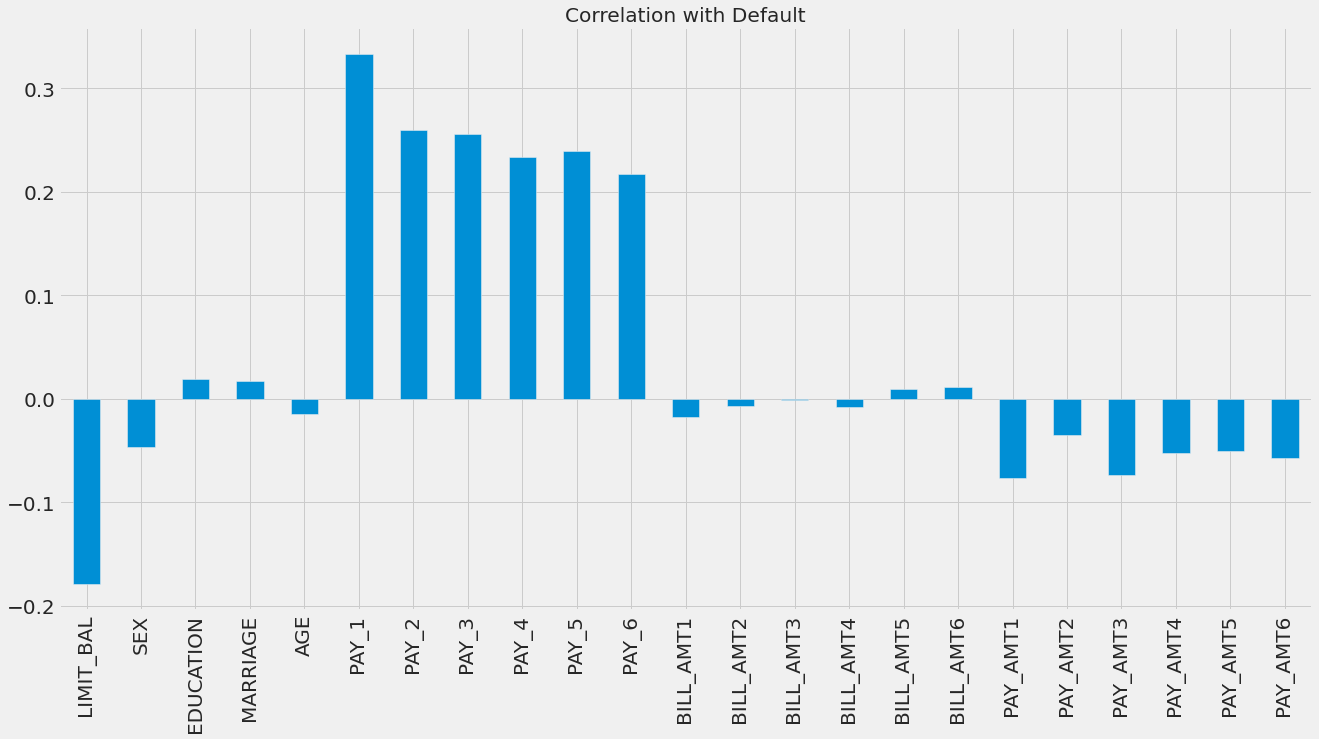

In [90]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

Cleaning

In [91]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2.0    925
1.0    715
3.0    325
4.0     35
Name: EDUCATION, dtype: int64

In [92]:
dataset['EDUCATION'].value_counts(dropna = False)

2.0    925
1.0    715
3.0    325
4.0     35
Name: EDUCATION, dtype: int64

In [93]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2.0    1076
1.0     904
3.0      20
Name: MARRIAGE, dtype: int64

In [94]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0.0    1788
2.0     190
3.0      10
4.0       5
7.0       3
5.0       2
6.0       2
Name: PAY_6, dtype: int64

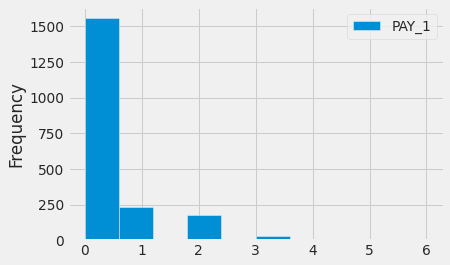

In [95]:
dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [96]:
dataset.SEX.nunique()


2

Label using one hot encoding

In [97]:
dataset.shape

(2000, 24)

In [98]:
dataset.columns = dataset.columns.map(str.lower)

In [99]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
10748.0,310000.0,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,172772.0,152397.0,110375.0,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0.0
12574.0,10000.0,2.0,3.0,1.0,49.0,0.0,0.0,0.0,0.0,2.0,2.0,32.0,-358.0,-748.0,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1.0
29677.0,50000.0,1.0,2.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,0.0,46257.0,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0.0
8857.0,80000.0,2.0,3.0,1.0,52.0,2.0,2.0,3.0,3.0,3.0,2.0,36649.0,39448.0,40101.0,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1.0
21099.0,270000.0,1.0,1.0,2.0,34.0,1.0,2.0,0.0,0.0,2.0,0.0,20979.0,17228.0,20924.0,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0.0


In [100]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [101]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
10748.0,1.050233,1.0,3.0,1.0,-0.378229,0.0,0.0,0.0,0.0,0.0,0.0,1.557993,1.401463,0.791676,0.607543,0.262893,-0.421472,0.240538,-0.009029,-0.095826,-0.129128,-0.245872,-0.175478,0.0
12574.0,-1.229991,2.0,3.0,1.0,1.481197,0.0,0.0,0.0,0.0,2.0,2.0,-0.695425,-0.692762,-0.624152,-0.648831,-0.651960,-0.640356,-0.394515,-0.158517,-0.149403,-0.314384,-0.295614,-0.269353,1.0
29677.0,-0.925961,1.0,2.0,1.0,-0.815741,0.0,0.0,0.0,0.0,0.0,0.0,-0.690233,-0.687854,-0.025257,0.024083,-0.649344,0.071838,-0.394515,0.993958,-0.178111,-0.234107,2.368160,-0.204297,0.0
8857.0,-0.697939,2.0,3.0,1.0,1.809331,2.0,2.0,3.0,3.0,3.0,2.0,-0.217751,-0.147034,-0.103692,-0.055342,-0.027241,0.015930,-0.111248,-0.118654,-0.205540,-0.314384,-0.209386,-0.194253,1.0
21099.0,0.746203,1.0,1.0,2.0,-0.159473,1.0,2.0,0.0,0.0,2.0,0.0,-0.422168,-0.451663,-0.348028,-0.333412,-0.420150,-0.368873,-0.394515,-0.058859,-0.187254,-0.314384,-0.185062,-0.175478,0.0


In [103]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

Decision Tree Classification

In [111]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [112]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [113]:
y_pred = dct.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [115]:
cm

array([[392,  81],
       [ 82,  45]])

In [116]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.728333,0.357143,0.354331,0.355731,0.591542


Random Forest Classification

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [118]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [119]:
y_pred = rfc.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [121]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.813333,0.631579,0.283465,0.391304,0.619534


Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [106]:
y_pred = logmodel.predict(X_test)

In [107]:
y_pred = logmodel.predict(X_test)


In [108]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.826667,0.694915,0.322835,0.44086,0.64239


In [109]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [110]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.815,0.722222,0.204724,0.319018,0.591791


XGBOOST classifier

In [122]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [123]:
y_pred =xgb.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [125]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.818333,0.660714,0.291339,0.404372,0.625585
